# ***MACHINE LEARNING PROJECT***<BR>
***Future sale prediction using python***

*Let’s start the task of future sales prediction with machine learning by importing the necessary Python libraries and the dataset:*

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("data.csv")
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [6]:
print(data.tail())

        TV  Radio  Newspaper  Sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4


In [7]:
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [8]:
data.info() # this info gives the information about our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
print(data["TV"].max())

296.4


*Let’s have a look at whether this dataset contains any null values or not:*

In [10]:
 # by doing this we know that our data has some null values or not
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


*So this dataset doesn’t have any null values. Now let’s visualize the relationship between the amount spent on advertising on TV and units sold:*

[ 14.64309139 -74.5147943 ]


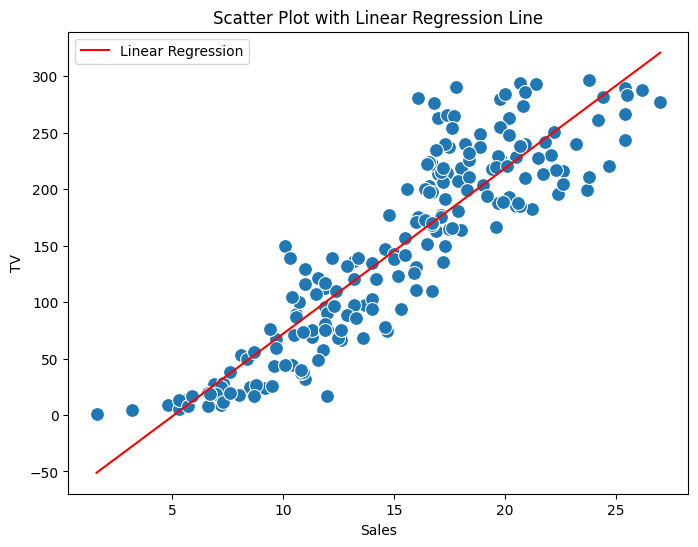

In [11]:


# Perform linear regression using NumPy
# for error that is in between original value and predicting value
# ka difference ka square
# Numpy polyfit() is a function that is used to fit the data within a polynomial function.
# By fitting data, we mean finding the least number of squares in the function that fits in a polynomial equation.
coefficients = np.polyfit(data["Sales"], data["TV"], 1)
print(coefficients)
# poly1d helps to define a polynomial function
poly = np.poly1d(coefficients)

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Sales", y="TV", data=data, s=100)

# Add the linear regression line
sns.lineplot(x=data["Sales"], y=poly(data["Sales"]), color='red', label='Linear Regression')

# Set labels and title
plt.xlabel("Sales")
plt.ylabel("TV")
plt.title("Scatter Plot with Linear Regression Line")

# Show the plot
plt.legend()
plt.show()

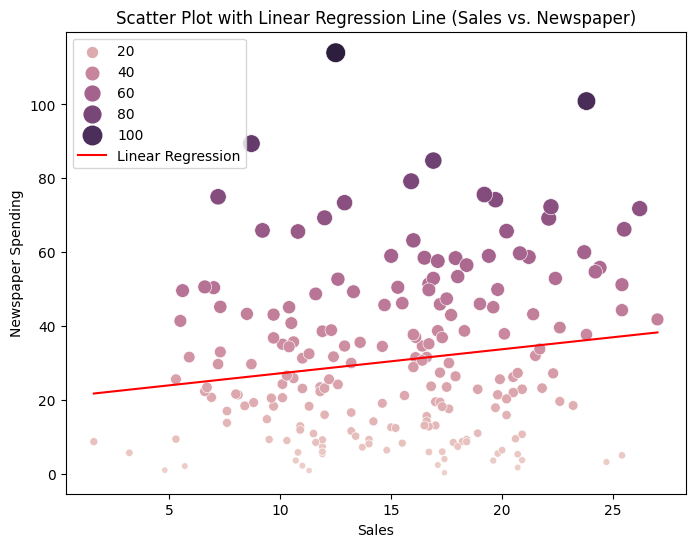

In [12]:
coefficients = np.polyfit(data["Sales"], data["Newspaper"], 1)
poly = np.poly1d(coefficients)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Sales", y="Newspaper", data=data, size="Newspaper", sizes=(20, 200), hue="Newspaper")

# Add the linear regression line
sns.lineplot(x=data["Sales"], y=poly(data["Sales"]), color='red', label='Linear Regression')

# Set labels and title
plt.xlabel("Sales")
plt.ylabel("Newspaper Spending")
plt.title("Scatter Plot with Linear Regression Line (Sales vs. Newspaper)")

# Show the plot
plt.legend()
plt.show()

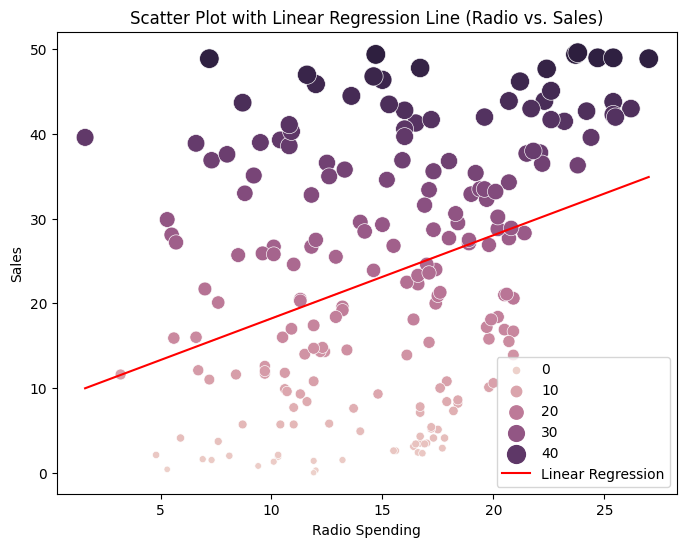

In [13]:
coefficients = np.polyfit(data["Sales"], data["Radio"], 1)
poly = np.poly1d(coefficients)

# Create the scatter plot with size encoding
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Sales", y="Radio", data=data, size="Radio", sizes=(20, 200), hue="Radio")

# Add the linear regression line
sns.lineplot(x=data["Sales"], y=poly(data["Sales"]), color='red', label='Linear Regression')

# Set labels and title
plt.xlabel("Radio Spending")
plt.ylabel("Sales")
plt.title("Scatter Plot with Linear Regression Line (Radio vs. Sales)")

# Show the plot
plt.legend()
plt.show()

In [14]:
correlation = data.corr()   # corr is the function in pandas

# with the help of this correlation we measure that our sales is depend on which factors is more
# Sort the correlations in descending order
# sort the correlations on basis of sales with other columns
sorted_correlation = correlation["Sales"].sort_values(ascending=False)

# Display the sorted correlation values
print(sorted_correlation)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


In [15]:
x = np.array(data.drop(["Sales"], axis=1))
x



array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [16]:
x = np.array(data.drop(["Sales"], axis=1))
y = np.array(data["Sales"])

# Split the data into training and test sets (80% training, 20% test)
# here random state means our train and test data have variance for the ml algorithm
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
# A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
from sklearn.metrics import r2_score

***TRAINING THE MODEL***
<BR>
using **fit ()**

In [18]:
model = LinearRegression()

# Train the model on the training data
model.fit(xtrain, ytrain)

# Predict the target variable on the test data
ypred = model.predict(xtest)

# Calculate the R-squared score (coefficient of determination)
#  r2_score is used in regression problems,
# whereas accuracy function is used in classification problem.
r2 = r2_score(ytest, ypred)

print(f"R-squared score: {r2}")

R-squared score: 0.9059011844150826


***TESTING THE MODEL***<BR>
Through giving the data of sales (TV, RADIO, NEWSPAPER)

In [19]:
# Define the features you want to predict for
# here we give the sales of tv , radio and newspaper
features = np.array([[230.1, 37.8, 69.2]])

# Use the trained model to make predictions
predicted_sales = model.predict(features)

# our model gives the prediction for the features
print(f"Predicted Sales: {predicted_sales[0]:.2f} units")

# here is our predicted sales for these values for test

Predicted Sales: 21.37 units


# ***SUMMARY***<br>



*So this is how we can train a machine learning model to predict the future sales of a product. Predicting the future sales of a product helps a business manage the manufacturing and advertising cost of the product. I hope you liked this for  future sales prediction with machine learning.